In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset
#Loading in dataset
instacart_df = pd.read_csv(r'C:\Users\Musaga\Desktop\INST 414\Medium post\Medium post 3\InstacartOrdersByDepartment.csv')
instacart_df.head()

# Pivot table to arrange data by department and hour of day
pivot_table = instacart_df.pivot_table(index='department', columns='order_hour_of_day', values='num_orders_hour', fill_value=0)

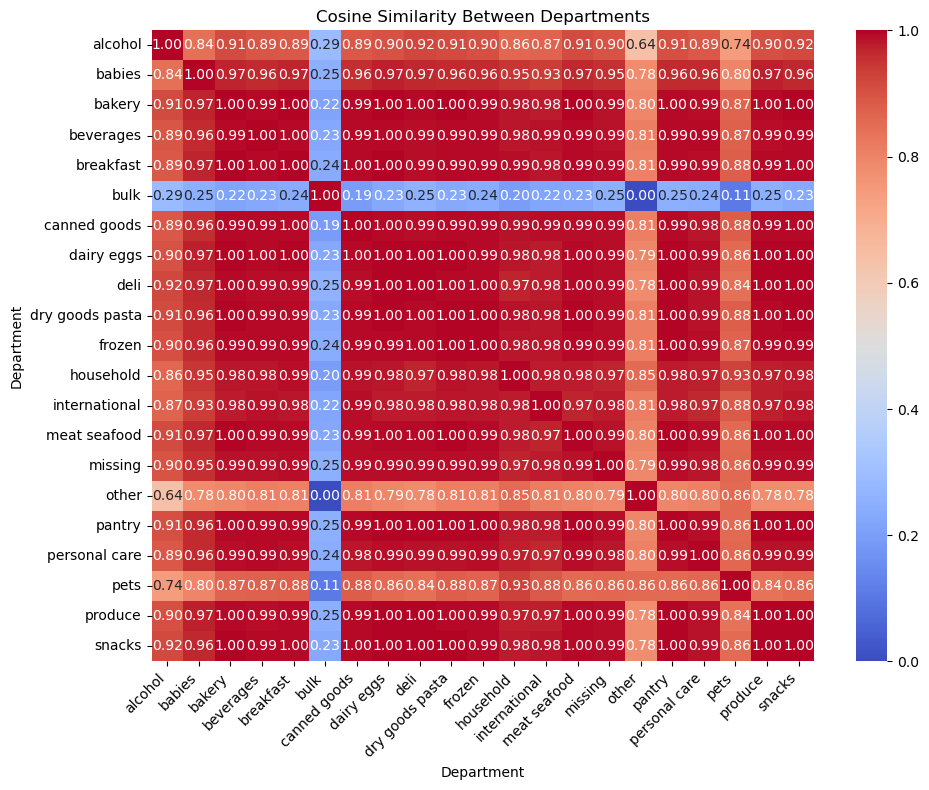

In [6]:
# Plot heatmap of similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=pivot_table.index, yticklabels=pivot_table.index)
plt.title('Cosine Similarity Between Departments')
plt.xlabel('Department')
plt.ylabel('Department')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivot_table)

# Compute cosine similarity
similarity_matrix = cosine_similarity(scaled_data)

# Function to get top similar departments for a given query department
def get_top_similar(query_dept, top_n=10):
    query_index = pivot_table.index.get_loc(query_dept)
    similarities = similarity_matrix[query_index]
    similar_depts_indices = similarities.argsort()[::-1][1:top_n+1]  # Exclude the query itself
    similar_depts = pivot_table.iloc[similar_depts_indices].index
    return similar_depts

# Queries
queries = ['alcohol', 'bakery', 'beverages']

# Print top similar departments for each query
for query_dept in queries:
    print(f"Top 10 similar departments for {query_dept} based on order hour frequency:")
    similar_depts = get_top_similar(query_dept)
    for i, dept in enumerate(similar_depts):
        print(f"{i+1}. {dept}")
    print()

Top 10 similar departments for alcohol based on order hour frequency:
1. deli
2. snacks
3. dry goods pasta
4. meat seafood
5. bakery
6. pantry
7. frozen
8. produce
9. dairy eggs
10. missing

Top 10 similar departments for bakery based on order hour frequency:
1. dairy eggs
2. snacks
3. dry goods pasta
4. breakfast
5. meat seafood
6. produce
7. deli
8. pantry
9. canned goods
10. frozen

Top 10 similar departments for beverages based on order hour frequency:
1. breakfast
2. dairy eggs
3. canned goods
4. pantry
5. personal care
6. bakery
7. frozen
8. snacks
9. dry goods pasta
10. meat seafood

